In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We can run scripts interactively from the ipython notebook with %run
%run change_column_names.py

In [3]:
df = pd.read_csv('deptos_eng.csv')

In [4]:
df.head(10)

,rooms,age,bath,neighborhood,aparment_floor,view,bedrooms,expenses,floor,nbr_floors,covered area,total_area,type,address,price
0,1.0,NaN,2.0,Belgrano - Capital Federal,NaN,Frente,NaN,6432.0,NaN,NaN,71.0,85.0,Departamento,Juramento 1900,26000
1,1.0,0 años,1.0,Belgrano - Capital Federal,NaN,NaN,NaN,4800.0,NaN,1.0,41.0,44.0,NaN,Arcos Al 2600,17500
2,1.0,5 años,1.0,Puerto Madero - Capital Federal,NaN,Frente,NaN,7000.0,NaN,NaN,42.0,42.0,NaN,Quartier Madero Urbano,20000
3,1.0,0 años,1.0,Coghlan - Capital Federal,NaN,NaN,NaN,2200.0,NaN,NaN,NaN,NaN,NaN,Juana Azurduy Al 3400,13500
4,1.0,2 años,1.0,Balvanera - Capital Federal,NaN,Frente,NaN,4800.0,NaN,NaN,38.0,41.0,NaN,Riobamba Al 400,12000
5,1.0,0 años,1.0,Almagro - Capital Federal,20.0,Contrafrente,NaN,NaN,3.0,7.0,38.0,42.0,NaN,Medrano 1020,12000
6,1.0,0 años,1.0,Belgrano - Capital Federal,NaN,Interno,NaN,3200.0,NaN,1.0,40.0,42.0,NaN,Roosevelt Al 3000,16900
7,1.0,NaN,1.0,Villa Urquiza - Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,32.0,32.0,Departamento,Av. Franklin Roosevelt 4900,18000
8,1.0,0 años,1.0,Villa Devoto - Capital Federal,NaN,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,San Martin Av. Al 5700,11500
9,1.0,0 años,1.0,Almagro - Capital Federal,NaN,Frente,NaN,NaN,NaN,NaN,25.0,34.0,Departamento,Venezuela Al 3700,9200


In [5]:
df.shape

(6348, 15)

In [6]:
df.describe()

,rooms,bath,aparment_floor,bedrooms,expenses,floor,nbr_floors,covered area,total_area,price
count,6226.000000,6242.000000,1478.000000,5718.000000,4078.000000,897.000000,2776.000000,6097.000000,6008.000000,6.348000e+03
mean,2.708962,1.462832,3.640054,1.758307,7531.844041,5.626533,7.999640,122.869444,118.855526,1.806386e+04
std,5.882554,0.774315,2.172411,1.071355,8304.352302,17.539302,7.524926,914.489686,1467.849158,2.601924e+04
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+02
25%,2.000000,1.000000,2.000000,1.000000,2594.000000,2.000000,2.000000,40.000000,42.000000,9.500000e+03
50%,2.000000,1.000000,3.000000,1.000000,4300.000000,4.000000,8.000000,52.000000,58.000000,1.400000e+04
75%,3.000000,2.000000,4.000000,2.000000,9000.000000,6.000000,10.000000,90.000000,99.000000,2.000000e+04
max,322.000000,7.000000,20.000000,30.000000,89971.000000,404.000000,82.000000,27111.000000,111111.000000,1.050000e+06


In [7]:
# Amount of NAs per column
df.isna().apply(np.sum) / df.shape[0]

rooms             0.019219
age               0.258349
bath              0.016698
neighborhood      0.000000
aparment_floor    0.767171
view              0.304505
bedrooms          0.099244
expenses          0.357593
floor             0.858696
nbr_floors        0.562697
covered area      0.039540
total_area        0.053560
type              0.473062
address           0.000473
price             0.000000
dtype: float64

In [8]:
df.head(2).T

,0,1
rooms,1,1
age,NaN,0 años
bath,2,1
neighborhood,Belgrano - Capital Federal,Belgrano - Capital Federal
aparment_floor,NaN,NaN
view,Frente,NaN
bedrooms,NaN,NaN
expenses,6432,4800
floor,NaN,NaN
nbr_floors,NaN,1


In [9]:
# Some data cleaning

In [10]:
df['neighborhood'] = df['neighborhood'].str.replace(' - Capital Federal', '', regex=False)
df['neighborhood'] = df['neighborhood'].str.lower()

In [11]:
df.neighborhood.value_counts()[:5]

palermo          654
belgrano         645
recoleta         543
caballito        401
puerto madero    386
Name: neighborhood, dtype: int64

In [12]:
df['age'] = df['age'].str.replace('[^0-9]+', '', regex=True)

In [13]:
df['age'] = df.age.astype('float64')

In [14]:
df.age.value_counts()[:5]

0.0     1056
40.0     464
50.0     257
45.0     230
30.0     224
2.0      198
10.0     192
5.0      186
Name: age, dtype: int64

In [15]:
np.nanpercentile(df.age.values, [5, 99.5])

array([ 0.   , 88.395])

/home/marbel/anaconda3/envs/eda/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/marbel/anaconda3/envs/eda/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.706e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   0. ,  196.8,  393.6,  590.4,  787.2,  984. , 1180.8, 1377.6,
        1574.4, 1771.2, 1968. ]),
 <a list of 10 Patch objects>)

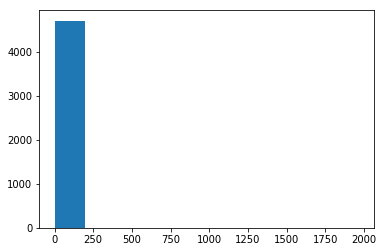

In [16]:
plt.hist(df[~df.isna()].age)

In [21]:
df.age.isna().sum()

1640

In [18]:
df.shape

(6348, 15)